In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
import time

%matplotlib inline

In [2]:
plt.style.use('dark_background')

# Region 0

### Read in files

In [19]:
region_0_cell_metadata = pd.read_csv(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\cell_metadata.csv")
region_0_cell_metadata

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,PolyT_raw,PolyT_high_pass,DAPI_raw,DAPI_high_pass
0,4407145100024100002,175,138.161143,12816.782053,4814.352778,12813.066322,4808.414472,12824.121912,4818.009996,2.343045,0,0.823255,1.652818,26737382.0,9.148100e+05,2965251.0,6.904459e+04
1,4407145100024100003,175,931.976251,12815.804917,4825.204551,12804.953757,4817.663671,12825.028770,4833.860915,1.273139,0,0.444592,2.490655,189377267.0,3.603528e+06,20194010.0,4.203734e+05
2,4407145100024100004,175,126.883905,12809.094034,4832.474021,12805.493226,4829.327420,12811.534492,4836.962442,1.228374,0,1.032309,2.608326,27956172.0,4.326129e+05,2916135.0,5.891114e+04
3,4407145100024100005,175,270.702020,12804.414066,4835.113501,12801.499258,4823.628567,12809.244994,4841.524549,2.310430,0,0.643781,1.791639,55133439.0,1.465138e+06,5887963.0,1.273591e+05
4,4407145100024100007,175,806.020688,12817.645478,4837.430336,12807.126571,4829.249281,12828.039735,4849.456219,1.320828,0,0.598234,2.048247,160122030.0,2.774006e+06,17344454.0,3.496560e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116075,4407145101587100029,149,54.325677,13401.323109,9785.650571,13396.456994,9777.422493,13406.475763,9792.682647,3.412612,0,1.133480,0.605700,8804294.0,7.581841e+04,1286495.0,2.340040e+04
116076,4407145101587100031,149,19.912418,13409.025633,9708.838290,13407.108148,9706.462937,13410.746852,9711.511714,1.414801,0,1.069691,1.000000,2768718.0,2.594566e+04,389469.0,6.994860e+03
116077,4407145101587100037,149,2839.375633,13411.260803,9763.049957,13385.435239,9739.841879,13422.698502,9788.338094,1.303130,0,0.475681,1.452339,432031847.0,4.379540e+06,60882589.0,1.235655e+06
116078,4407145101587100041,149,18.265483,13408.832070,9708.091827,13406.971379,9706.408778,13410.490095,9709.843770,1.187366,0,1.503426,1.514258,2780285.0,2.103688e+04,373826.0,6.635689e+03


In [26]:
list(region_0_cell_metadata['transcript_count'].unique())

[0,
 2,
 3,
 26,
 1,
 10,
 6,
 171,
 5,
 4,
 8,
 11,
 21,
 13,
 45,
 49,
 12,
 15,
 7,
 30,
 9,
 22,
 19,
 69,
 718,
 48,
 109,
 191,
 14,
 54,
 71,
 25,
 27,
 23,
 31,
 16,
 28,
 17,
 42,
 29,
 445,
 39,
 213,
 18,
 532,
 492,
 707,
 601,
 137,
 82,
 242,
 164,
 279,
 422,
 105,
 257,
 75,
 35,
 20,
 47,
 44,
 38,
 67,
 119,
 170,
 129,
 159,
 124,
 162,
 56,
 24,
 1186,
 223,
 95,
 36,
 88,
 139,
 134,
 245,
 347,
 57,
 41,
 265,
 246,
 65,
 86,
 138,
 103,
 133,
 154,
 283,
 84,
 372,
 55,
 208,
 348,
 144,
 261,
 50,
 458,
 62,
 98,
 314,
 94,
 145,
 210,
 58,
 625,
 369,
 135,
 43,
 87,
 324,
 183,
 515,
 282,
 322,
 117,
 207,
 101,
 344,
 215,
 719,
 197,
 37,
 136,
 120,
 376,
 63,
 53,
 168,
 661,
 146,
 204,
 143,
 46,
 360,
 546,
 96,
 140,
 85,
 40,
 182,
 107,
 106,
 321,
 200,
 178,
 438,
 80,
 147,
 205,
 189,
 190,
 61,
 518,
 108,
 99,
 52,
 32,
 83,
 529,
 214,
 317,
 297,
 286,
 228,
 90,
 163,
 72,
 111,
 112,
 201,
 60,
 125,
 181,
 81,
 196,
 34,
 78,
 76,
 175,
 

In [20]:
region_0_cell_by_gene = pd.read_csv(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\cell_metadata.csv")
region_0_cell_by_gene

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,PolyT_raw,PolyT_high_pass,DAPI_raw,DAPI_high_pass
0,4407145100024100002,175,138.161143,12816.782053,4814.352778,12813.066322,4808.414472,12824.121912,4818.009996,2.343045,0,0.823255,1.652818,26737382.0,9.148100e+05,2965251.0,6.904459e+04
1,4407145100024100003,175,931.976251,12815.804917,4825.204551,12804.953757,4817.663671,12825.028770,4833.860915,1.273139,0,0.444592,2.490655,189377267.0,3.603528e+06,20194010.0,4.203734e+05
2,4407145100024100004,175,126.883905,12809.094034,4832.474021,12805.493226,4829.327420,12811.534492,4836.962442,1.228374,0,1.032309,2.608326,27956172.0,4.326129e+05,2916135.0,5.891114e+04
3,4407145100024100005,175,270.702020,12804.414066,4835.113501,12801.499258,4823.628567,12809.244994,4841.524549,2.310430,0,0.643781,1.791639,55133439.0,1.465138e+06,5887963.0,1.273591e+05
4,4407145100024100007,175,806.020688,12817.645478,4837.430336,12807.126571,4829.249281,12828.039735,4849.456219,1.320828,0,0.598234,2.048247,160122030.0,2.774006e+06,17344454.0,3.496560e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116075,4407145101587100029,149,54.325677,13401.323109,9785.650571,13396.456994,9777.422493,13406.475763,9792.682647,3.412612,0,1.133480,0.605700,8804294.0,7.581841e+04,1286495.0,2.340040e+04
116076,4407145101587100031,149,19.912418,13409.025633,9708.838290,13407.108148,9706.462937,13410.746852,9711.511714,1.414801,0,1.069691,1.000000,2768718.0,2.594566e+04,389469.0,6.994860e+03
116077,4407145101587100037,149,2839.375633,13411.260803,9763.049957,13385.435239,9739.841879,13422.698502,9788.338094,1.303130,0,0.475681,1.452339,432031847.0,4.379540e+06,60882589.0,1.235655e+06
116078,4407145101587100041,149,18.265483,13408.832070,9708.091827,13406.971379,9706.408778,13410.490095,9709.843770,1.187366,0,1.503426,1.514258,2780285.0,2.103688e+04,373826.0,6.635689e+03


In [21]:
region_0_detected_transcripts = pd.read_csv(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\detected_transcripts.csv")
region_0_detected_transcripts

,Unnamed: 0,barcode_id,global_x,global_y,global_z,x,y,fov,gene,transcript_id,cell_id
0,21,2,14664.029,8031.0366,0.0,582.050840,281.44882,0,Ccnd2,ENSMUST00000000188,4407145101022100064
1,22,2,14663.394,8031.6855,0.0,576.159550,287.45895,0,Ccnd2,ENSMUST00000000188,4407145101022100043
2,33,2,14612.556,8050.0566,0.0,105.439964,457.56003,0,Ccnd2,ENSMUST00000000188,4407145101022100050
3,3,6,14640.600,8022.0454,0.0,365.111700,198.19635,0,Pdgfra,ENSMUST00000000476,-1
4,7,7,14670.108,8014.1770,0.0,638.340200,125.34019,0,Sox9,ENSMUST00000000579,-1
...,...,...,...,...,...,...,...,...,...,...,...
14054239,101,389,9633.898,8490.2040,4.0,306.768950,829.00000,474,Pde11a,ENSMUST00000124825,-1
14054240,192,389,9804.063,8569.3680,4.0,1882.372000,1562.00000,474,Pde11a,ENSMUST00000124825,-1
14054241,38,534,9723.471,8426.4390,4.0,1136.141000,238.58476,474,Blank-35,Blank-35,-1
14054242,312,158,9745.461,8500.7705,5.0,1339.753000,926.83520,474,Necab1,ENSMUST00000041606,-1


In [24]:
region_0_cell_boundary = pd.read_parquet(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\cell_boundaries.parquet")
region_0_cell_boundary

,ID,EntityID,ZIndex,Geometry,Type,ZLevel,Name,ParentID,ParentType
1,1,4407145100024100002,0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...,cell,1.5,None,None,None
2,2,4407145100024100003,0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...,cell,1.5,None,None,None
3,3,4407145100024100004,0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...,cell,1.5,None,None,None
4,4,4407145100024100005,0,"b""\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...",cell,1.5,None,None,None
5,5,4407145100024100007,0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...,cell,1.5,None,None,None
...,...,...,...,...,...,...,...,...,...
346047,299919,4407145101587100043,5,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...,cell,9.0,None,None,None
346048,299920,4407145101587100037,5,b'\x01\x06\x00\x00\x00\t\x00\x00\x00\x01\x03\x...,cell,9.0,None,None,None
346049,299921,4407145101587100041,5,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...,cell,9.0,None,None,None
346051,299922,4407145101587100043,6,"b""\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...",cell,10.5,None,None,None


### Filter out cells

In [45]:
# filter out metadata with less than 5 transcripts per cell
region_0_cell_metadata_filtered = region_0_cell_metadata[region_0_cell_metadata['transcript_count'] >= 5]
region_0_cell_metadata_filtered

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,PolyT_raw,PolyT_high_pass,DAPI_raw,DAPI_high_pass
37,4407145100026100003,174,1205.269337,13100.976393,4905.167699,13090.484960,4894.559965,13113.388244,4914.757497,1.136523,26,0.374649,2.501584,310025959.0,2.850204e+06,209921677.0,2.169193e+06
52,4407145100027100001,174,1013.276807,13162.377047,4887.565488,13146.200328,4871.028848,13184.767050,4907.071422,1.470329,10,0.448935,0.719890,236251841.0,5.518342e+06,78751324.0,9.368098e+05
53,4407145100027100002,174,1696.480473,13132.329733,4893.811246,13116.217120,4873.583763,13154.751388,4921.421284,1.345610,10,0.423148,0.975533,365100562.0,3.895633e+06,160390342.0,1.912250e+06
55,4407145100027100004,174,3738.588570,13200.240275,4886.456385,13174.478149,4861.942718,13220.636633,4910.755149,1.681857,6,0.440268,1.844888,760128162.0,1.496207e+07,150448082.0,2.254143e+06
58,4407145100027100010,174,1211.321419,13195.172457,4931.941094,13187.051277,4921.881428,13209.402917,4950.246215,2.058480,171,0.313758,2.281550,393456471.0,4.681029e+06,245610625.0,2.433828e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113305,4407145101463100005,147,473.050741,13294.607175,9342.952505,13287.397978,9337.042403,13301.526959,9350.540163,1.055443,54,0.377876,2.186337,143740133.0,1.529376e+06,106740176.0,1.462239e+06
113792,4407145101498100002,245,276.234174,12555.107186,9484.564658,12542.041272,9467.181551,12568.220188,9498.600317,1.999321,8,0.715318,0.430953,61576686.0,2.079585e+06,19256805.0,3.998244e+05
113794,4407145101498100006,245,663.675363,12533.106705,9483.651636,12523.876041,9474.134834,12540.568101,9491.680749,1.306183,53,0.339570,2.296354,222243400.0,2.451869e+06,222401390.0,2.161856e+06
113798,4407145101498100010,245,334.098970,12555.154199,9484.346909,12541.993005,9467.179602,12565.515585,9497.956990,2.451505,5,0.482563,0.630522,61584351.0,5.226322e+05,18385960.0,2.796479e+05


In [67]:
# filter out metadata with less than 5 transcripts per cell
region_0_cell_by_gene_filtered = region_0_cell_by_gene[region_0_cell_by_gene['transcript_count'] >= 5]
region_0_cell_by_gene_filtered

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,PolyT_raw,PolyT_high_pass,DAPI_raw,DAPI_high_pass
37,4407145100026100003,174,1205.269337,13100.976393,4905.167699,13090.484960,4894.559965,13113.388244,4914.757497,1.136523,26,0.374649,2.501584,310025959.0,2.850204e+06,209921677.0,2.169193e+06
52,4407145100027100001,174,1013.276807,13162.377047,4887.565488,13146.200328,4871.028848,13184.767050,4907.071422,1.470329,10,0.448935,0.719890,236251841.0,5.518342e+06,78751324.0,9.368098e+05
53,4407145100027100002,174,1696.480473,13132.329733,4893.811246,13116.217120,4873.583763,13154.751388,4921.421284,1.345610,10,0.423148,0.975533,365100562.0,3.895633e+06,160390342.0,1.912250e+06
55,4407145100027100004,174,3738.588570,13200.240275,4886.456385,13174.478149,4861.942718,13220.636633,4910.755149,1.681857,6,0.440268,1.844888,760128162.0,1.496207e+07,150448082.0,2.254143e+06
58,4407145100027100010,174,1211.321419,13195.172457,4931.941094,13187.051277,4921.881428,13209.402917,4950.246215,2.058480,171,0.313758,2.281550,393456471.0,4.681029e+06,245610625.0,2.433828e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113305,4407145101463100005,147,473.050741,13294.607175,9342.952505,13287.397978,9337.042403,13301.526959,9350.540163,1.055443,54,0.377876,2.186337,143740133.0,1.529376e+06,106740176.0,1.462239e+06
113792,4407145101498100002,245,276.234174,12555.107186,9484.564658,12542.041272,9467.181551,12568.220188,9498.600317,1.999321,8,0.715318,0.430953,61576686.0,2.079585e+06,19256805.0,3.998244e+05
113794,4407145101498100006,245,663.675363,12533.106705,9483.651636,12523.876041,9474.134834,12540.568101,9491.680749,1.306183,53,0.339570,2.296354,222243400.0,2.451869e+06,222401390.0,2.161856e+06
113798,4407145101498100010,245,334.098970,12555.154199,9484.346909,12541.993005,9467.179602,12565.515585,9497.956990,2.451505,5,0.482563,0.630522,61584351.0,5.226322e+05,18385960.0,2.796479e+05


In [48]:
cell_id_list = list(region_0_cell_metadata_filtered['EntityID'].unique())
cell_id_list

[4407145100026100003,
 4407145100027100001,
 4407145100027100002,
 4407145100027100004,
 4407145100027100010,
 4407145100027100043,
 4407145100065100009,
 4407145100065100012,
 4407145100066100001,
 4407145100066100003,
 4407145100066100005,
 4407145100066100006,
 4407145100066100009,
 4407145100066100017,
 4407145100066100018,
 4407145100066100033,
 4407145100067100003,
 4407145100067100004,
 4407145100067100005,
 4407145100067100006,
 4407145100067100007,
 4407145100067100011,
 4407145100067100012,
 4407145100067100013,
 4407145100067100014,
 4407145100067100015,
 4407145100067100016,
 4407145100067100017,
 4407145100067100018,
 4407145100067100019,
 4407145100067100022,
 4407145100067100023,
 4407145100067100031,
 4407145100067100032,
 4407145100067100033,
 4407145100067100034,
 4407145100067100035,
 4407145100067100036,
 4407145100067100038,
 4407145100067100039,
 4407145100067100048,
 4407145100067100058,
 4407145100067100062,
 4407145100067100070,
 4407145100067100071,
 440714510

In [50]:
region_0_detected_transcripts_filtered = region_0_detected_transcripts[region_0_detected_transcripts['cell_id'].isin(cell_id_list)]
region_0_detected_transcripts_filtered

,Unnamed: 0,barcode_id,global_x,global_y,global_z,x,y,fov,gene,transcript_id,cell_id
0,21,2,14664.029,8031.0366,0.0,582.050840,281.448820,0,Ccnd2,ENSMUST00000000188,4407145101022100064
1,22,2,14663.394,8031.6855,0.0,576.159550,287.458950,0,Ccnd2,ENSMUST00000000188,4407145101022100043
2,33,2,14612.556,8050.0566,0.0,105.439964,457.560030,0,Ccnd2,ENSMUST00000000188,4407145101022100050
12,9,20,14659.596,8023.7520,0.0,541.000000,214.000000,0,Igf1r,ENSMUST00000005671,4407145101022100064
13,23,21,14615.100,8013.4920,0.0,129.000000,119.000000,0,Kit,ENSMUST00000005815,4407145101022100039
...,...,...,...,...,...,...,...,...,...,...,...
14054214,8,7,9803.644,8216.2590,6.0,1878.485700,144.465880,473,Sox9,ENSMUST00000000579,4407145101067100005
14054216,3,59,9810.558,8211.5930,6.0,1942.501600,101.262490,473,Fezf2,ENSMUST00000022262,4407145101067100005
14054217,4,178,9810.863,8216.3160,6.0,1945.326300,145.000000,473,Arx,ENSMUST00000046565,4407145101067100007
14054218,9,320,9803.441,8214.2530,6.0,1876.612700,125.895584,473,Meis2,ENSMUST00000102538,4407145101067100005


### Generate gene expression matrix

In [51]:
region_0_detected_transcripts_filtered

,Unnamed: 0,barcode_id,global_x,global_y,global_z,x,y,fov,gene,transcript_id,cell_id
0,21,2,14664.029,8031.0366,0.0,582.050840,281.448820,0,Ccnd2,ENSMUST00000000188,4407145101022100064
1,22,2,14663.394,8031.6855,0.0,576.159550,287.458950,0,Ccnd2,ENSMUST00000000188,4407145101022100043
2,33,2,14612.556,8050.0566,0.0,105.439964,457.560030,0,Ccnd2,ENSMUST00000000188,4407145101022100050
12,9,20,14659.596,8023.7520,0.0,541.000000,214.000000,0,Igf1r,ENSMUST00000005671,4407145101022100064
13,23,21,14615.100,8013.4920,0.0,129.000000,119.000000,0,Kit,ENSMUST00000005815,4407145101022100039
...,...,...,...,...,...,...,...,...,...,...,...
14054214,8,7,9803.644,8216.2590,6.0,1878.485700,144.465880,473,Sox9,ENSMUST00000000579,4407145101067100005
14054216,3,59,9810.558,8211.5930,6.0,1942.501600,101.262490,473,Fezf2,ENSMUST00000022262,4407145101067100005
14054217,4,178,9810.863,8216.3160,6.0,1945.326300,145.000000,473,Arx,ENSMUST00000046565,4407145101067100007
14054218,9,320,9803.441,8214.2530,6.0,1876.612700,125.895584,473,Meis2,ENSMUST00000102538,4407145101067100005


In [52]:
region_0_detected_transcripts_grouped = region_0_detected_transcripts_filtered.groupby(['cell_id', 'gene']).count()[['transcript_id']].reset_index()
region_0_detected_transcripts_grouped

,cell_id,gene,transcript_id
0,4407145100026100003,Efemp1,1
1,4407145100026100003,Nfix,1
2,4407145100026100003,Nmbr,1
3,4407145100026100003,Pcdh11x,1
4,4407145100026100003,Pomc,22
...,...,...,...
3187030,4407145101498100015,Calb1,1
3187031,4407145101498100015,Cbln1,1
3187032,4407145101498100015,Cxcl12,1
3187033,4407145101498100015,Grik1,1


In [53]:
region_0_gene_exp = region_0_detected_transcripts_grouped.pivot_table(index='cell_id', columns='gene', values='transcript_id', fill_value=0)
region_0_gene_exp

gene,4930452B06Rik,5031425F14Rik,Abcc9,Ackr1,Acta2,Adcyap1,Adgra1,Adgra3,Adgrf5,Adgrg2,...,Upb1,Ust,Vcan,Vgf,Vip,Vipr2,Vmn2r1,Vwc2,Wfs1,Wnt7b
cell_id,,,,,,,,,,,,,,,,,,,,,
4407145100026100003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4407145100027100001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4407145100027100002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4407145100027100004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4407145100027100010,3,0,1,1,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407145101463100005,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4407145101498100002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4407145101498100006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
region_0_gene_exp.to_csv(r'D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\region_0_gene_exp.csv', index = False)

In [59]:
region_0_scdata = sc.read_csv(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\region_0_gene_exp.csv")
region_0_scdata

AnnData object with n_obs × n_vars = 74457 × 550

In [62]:
region_0_cell_metadata_filtered

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,PolyT_raw,PolyT_high_pass,DAPI_raw,DAPI_high_pass
37,4407145100026100003,174,1205.269337,13100.976393,4905.167699,13090.484960,4894.559965,13113.388244,4914.757497,1.136523,26,0.374649,2.501584,310025959.0,2.850204e+06,209921677.0,2.169193e+06
52,4407145100027100001,174,1013.276807,13162.377047,4887.565488,13146.200328,4871.028848,13184.767050,4907.071422,1.470329,10,0.448935,0.719890,236251841.0,5.518342e+06,78751324.0,9.368098e+05
53,4407145100027100002,174,1696.480473,13132.329733,4893.811246,13116.217120,4873.583763,13154.751388,4921.421284,1.345610,10,0.423148,0.975533,365100562.0,3.895633e+06,160390342.0,1.912250e+06
55,4407145100027100004,174,3738.588570,13200.240275,4886.456385,13174.478149,4861.942718,13220.636633,4910.755149,1.681857,6,0.440268,1.844888,760128162.0,1.496207e+07,150448082.0,2.254143e+06
58,4407145100027100010,174,1211.321419,13195.172457,4931.941094,13187.051277,4921.881428,13209.402917,4950.246215,2.058480,171,0.313758,2.281550,393456471.0,4.681029e+06,245610625.0,2.433828e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113305,4407145101463100005,147,473.050741,13294.607175,9342.952505,13287.397978,9337.042403,13301.526959,9350.540163,1.055443,54,0.377876,2.186337,143740133.0,1.529376e+06,106740176.0,1.462239e+06
113792,4407145101498100002,245,276.234174,12555.107186,9484.564658,12542.041272,9467.181551,12568.220188,9498.600317,1.999321,8,0.715318,0.430953,61576686.0,2.079585e+06,19256805.0,3.998244e+05
113794,4407145101498100006,245,663.675363,12533.106705,9483.651636,12523.876041,9474.134834,12540.568101,9491.680749,1.306183,53,0.339570,2.296354,222243400.0,2.451869e+06,222401390.0,2.161856e+06
113798,4407145101498100010,245,334.098970,12555.154199,9484.346909,12541.993005,9467.179602,12565.515585,9497.956990,2.451505,5,0.482563,0.630522,61584351.0,5.226322e+05,18385960.0,2.796479e+05


In [65]:
region_0_scdata.obs['cell_id'] = region_0_cell_metadata_filtered['EntityID'].values

In [68]:
region_0_scdata.obs['sample_id'] = 'region_0'

In [70]:
region_0_scdata.obs['transcript_count'] = region_0_cell_metadata_filtered['transcript_count'].values

In [71]:
region_0_scdata.obs

,cell_id,sample_id,transcript_count
0,4407145100026100003,region_0,26
1,4407145100027100001,region_0,10
2,4407145100027100002,region_0,10
3,4407145100027100004,region_0,6
4,4407145100027100010,region_0,171
...,...,...,...
74452,4407145101463100005,region_0,54
74453,4407145101498100002,region_0,8
74454,4407145101498100006,region_0,53
74455,4407145101498100010,region_0,5


### Generate umap

In [89]:
sc.pp.log1p(region_0_scdata)
sc.pp.normalize_total(region_0_scdata)
sc.pp.scale(region_0_scdata, zero_center = True)
sc.pp.pca(region_0_scdata, n_comps = 50, random_state = 42)
umap_operator = umap.UMAP(n_components = 2, random_state = 42, metric = 'euclidean', min_dist = 0.01)
umap_result_cosmx = umap_operator.fit_transform(region_0_scdata.obsm['X_pca'])
region_0_scdata.obsm['X_umap'] = umap_result_cosmx
sc.pp.neighbors(region_0_scdata, use_rep = 'X_umap', n_neighbors = 40)

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [91]:
sc.tl.leiden(region_0_scdata, resolution = 0.05)

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


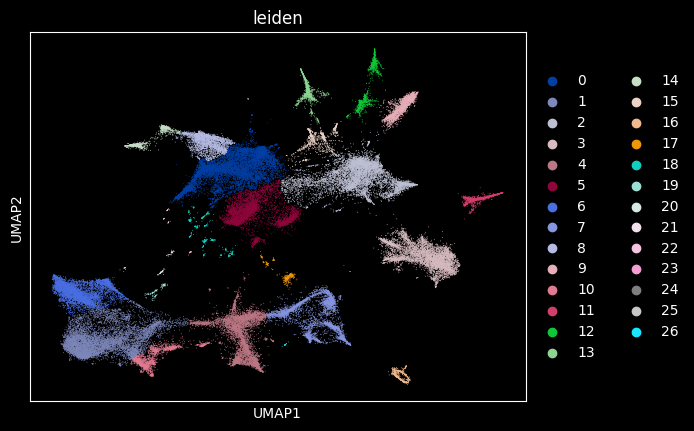

In [92]:
sc.pl.umap(region_0_scdata, color = 'leiden')

In [93]:
region_0_scdata.var.index

Index(['4930452B06Rik', '5031425F14Rik', 'Abcc9', 'Ackr1', 'Acta2', 'Adcyap1',
       'Adgra1', 'Adgra3', 'Adgrf5', 'Adgrg2',
       ...
       'Upb1', 'Ust', 'Vcan', 'Vgf', 'Vip', 'Vipr2', 'Vmn2r1', 'Vwc2', 'Wfs1',
       'Wnt7b'],
      dtype='object', length=550)

### Generate Brain Projection map

In [94]:
region_0_cell_metadata_filtered

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,PolyT_raw,PolyT_high_pass,DAPI_raw,DAPI_high_pass
37,4407145100026100003,174,1205.269337,13100.976393,4905.167699,13090.484960,4894.559965,13113.388244,4914.757497,1.136523,26,0.374649,2.501584,310025959.0,2.850204e+06,209921677.0,2.169193e+06
52,4407145100027100001,174,1013.276807,13162.377047,4887.565488,13146.200328,4871.028848,13184.767050,4907.071422,1.470329,10,0.448935,0.719890,236251841.0,5.518342e+06,78751324.0,9.368098e+05
53,4407145100027100002,174,1696.480473,13132.329733,4893.811246,13116.217120,4873.583763,13154.751388,4921.421284,1.345610,10,0.423148,0.975533,365100562.0,3.895633e+06,160390342.0,1.912250e+06
55,4407145100027100004,174,3738.588570,13200.240275,4886.456385,13174.478149,4861.942718,13220.636633,4910.755149,1.681857,6,0.440268,1.844888,760128162.0,1.496207e+07,150448082.0,2.254143e+06
58,4407145100027100010,174,1211.321419,13195.172457,4931.941094,13187.051277,4921.881428,13209.402917,4950.246215,2.058480,171,0.313758,2.281550,393456471.0,4.681029e+06,245610625.0,2.433828e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113305,4407145101463100005,147,473.050741,13294.607175,9342.952505,13287.397978,9337.042403,13301.526959,9350.540163,1.055443,54,0.377876,2.186337,143740133.0,1.529376e+06,106740176.0,1.462239e+06
113792,4407145101498100002,245,276.234174,12555.107186,9484.564658,12542.041272,9467.181551,12568.220188,9498.600317,1.999321,8,0.715318,0.430953,61576686.0,2.079585e+06,19256805.0,3.998244e+05
113794,4407145101498100006,245,663.675363,12533.106705,9483.651636,12523.876041,9474.134834,12540.568101,9491.680749,1.306183,53,0.339570,2.296354,222243400.0,2.451869e+06,222401390.0,2.161856e+06
113798,4407145101498100010,245,334.098970,12555.154199,9484.346909,12541.993005,9467.179602,12565.515585,9497.956990,2.451505,5,0.482563,0.630522,61584351.0,5.226322e+05,18385960.0,2.796479e+05


In [95]:
region_0_spatial = pd.DataFrame()
region_0_spatial['x_centroid'] = region_0_cell_metadata_filtered['center_x']
region_0_spatial['y_centroid'] = region_0_cell_metadata_filtered['center_y']

In [98]:
region_0_spatial_matrix = region_0_spatial.values
region_0_spatial_matrix

array([[13100.97639254,  4905.1676986 ],
       [13162.37704676,  4887.56548847],
       [13132.32973323,  4893.81124645],
       ...,
       [12533.10670524,  9483.6516359 ],
       [12555.15419894,  9484.3469094 ],
       [12534.27855113,  9483.82324966]])

In [99]:
region_0_scdata.obsm['X_spatial'] = region_0_spatial_matrix

In [100]:
region_0_scdata

AnnData object with n_obs × n_vars = 74457 × 550
    obs: 'cell_id', 'sample_id', 'transcript_count', 'leiden'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors', 'log1p'
    obsm: 'X_pca', 'X_umap', 'X_spatial'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


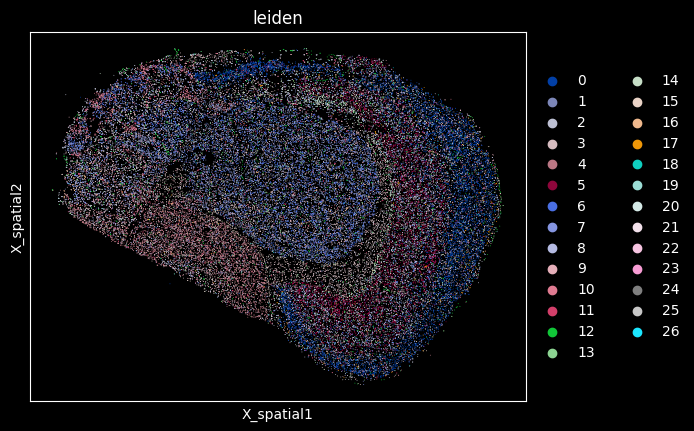

In [101]:
sc.pl.embedding(region_0_scdata, basis = 'X_spatial', color = 'leiden')

In [102]:
region_0_scdata.write(r'D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\region_0_scdata.h5ad')

In [7]:
def filter_transcripts(file, min_transcript):
    return file[file['transcript_count'] >= min_transcript]

In [8]:
def generate_gene_expr_matrix(file):
    file_detected_transcripts_grouped = file.groupby(['cell_id', 'gene']).count()[['transcript_id']].reset_index()
    file_gene_exp = file_detected_transcripts_grouped.pivot_table(index='cell_id', columns='gene', values='transcript_id', fill_value=0)
    return file_gene_exp

In [9]:
def generate_x_spatial(file):
    file_spatial = pd.DataFrame()
    file_spatial['x_centroid'] = file['center_x']
    file_spatial['y_centroid'] = file['center_y']
    return file_spatial.values

In [39]:
def generate_h5ad_pipeline(region, min_transcript = 5, resolution = 0.05):
    # read in files
    metadata = pd.read_csv(rf"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\{region}\cell_metadata.csv")
    #cell_by_gene = pd.read_csv(rf"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\{region}\cell_by_gene.csv")
    detected_transcripts = pd.read_csv(rf"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\{region}\detected_transcripts.csv")
    # filter out cells
    filtered_metadata = filter_transcripts(metadata, min_transcript)
    print (filtered_metadata.shape)
    #filtered_cell_by_gene = filter_transcripts(cell_by_gene, min_transcript)
    #filter transcripts
    cell_id_list = list(filtered_metadata['EntityID'].unique())
    print (len(cell_id_list))
    filtered_detected_transcripts = detected_transcripts[detected_transcripts['cell_id'].isin(cell_id_list)]
    print (filtered_detected_transcripts.shape)
    # Generate gene expression matrix
    gene_expr_matrix = generate_gene_expr_matrix(filtered_detected_transcripts)
    gene_expr_matrix.to_csv(rf'D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\{region}\{region}_gene_exp.csv', index = False)
    # Generate h5ad file
    scdata = sc.read_csv(rf'D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\{region}\{region}_gene_exp.csv')
    print (scdata.X.shape)
    # Generate scdata.obs
    scdata.obs['cell_id'] = filtered_metadata['EntityID'].values
    scdata.obs['sample_id'] = f'{region}'.lower()
    scdata.obs['transcript_count'] = filtered_metadata['transcript_count'].values
    # Generate umap
    sc.pp.log1p(scdata)
    sc.pp.normalize_total(scdata)
    sc.pp.scale(scdata, zero_center = True)
    sc.pp.pca(scdata, n_comps = 50, random_state = 42)
    umap_operator = umap.UMAP(n_components = 2, random_state = 42, metric = 'euclidean', min_dist = 0.01)
    umap_result_cosmx = umap_operator.fit_transform(scdata.obsm['X_pca'])
    scdata.obsm['X_umap'] = umap_result_cosmx
    sc.pp.neighbors(scdata, use_rep = 'X_umap', n_neighbors = 40)
    sc.tl.leiden(scdata, resolution = resolution)
    # Generate X_spatial
    scdata.obsm['X_spatial'] = generate_x_spatial(filtered_metadata)
    # write scdata
    scdata.write(rf'D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\{region}\{region}_scdata.h5ad')

In [32]:
generate_h5ad_pipeline('Region 1')

(80575, 17)
80575
(13325798, 11)
(80575, 550)


C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [41]:
generate_h5ad_pipeline('Region 3')

(97587, 17)
97587
(17736864, 11)
(97587, 550)


C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [43]:
generate_h5ad_pipeline('Region 2')

(92068, 17)
92068
(21013441, 11)
(92068, 550)


C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [44]:
region_0_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\region_0_scdata.h5ad")
region_1_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 1\Region 1_scdata.h5ad")
region_2_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 2\Region 2_scdata.h5ad")
region_3_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 3\Region 3_scdata.h5ad")

In [47]:
region_0_scdata

AnnData object with n_obs × n_vars = 74457 × 550
    obs: 'cell_id', 'sample_id', 'transcript_count', 'leiden'
    var: 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [49]:
region_1_scdata

AnnData object with n_obs × n_vars = 80575 × 550
    obs: 'cell_id', 'sample_id', 'transcript_count', 'leiden'
    var: 'mean', 'std'
    uns: 'leiden', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


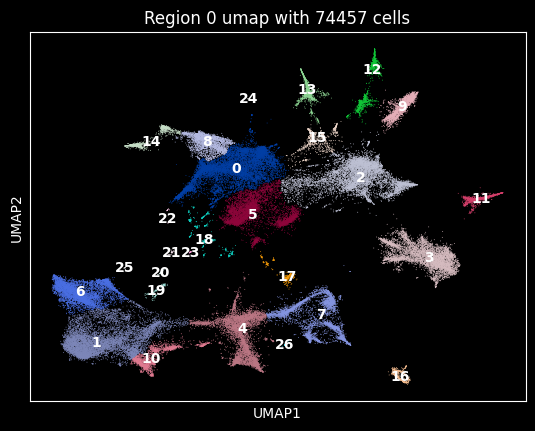

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


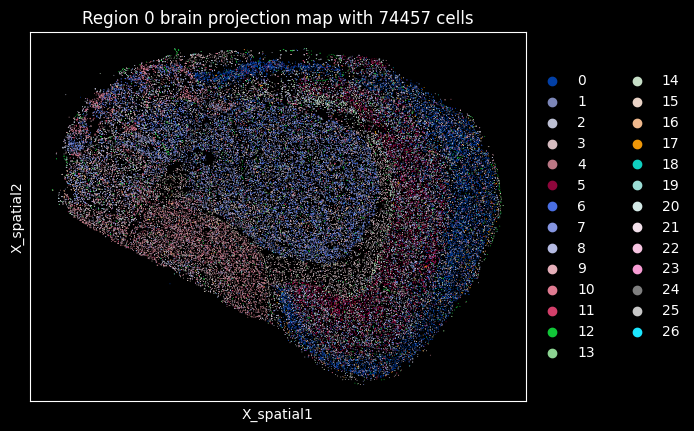

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


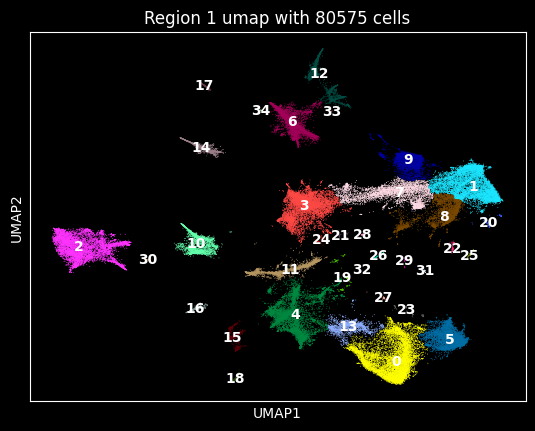

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


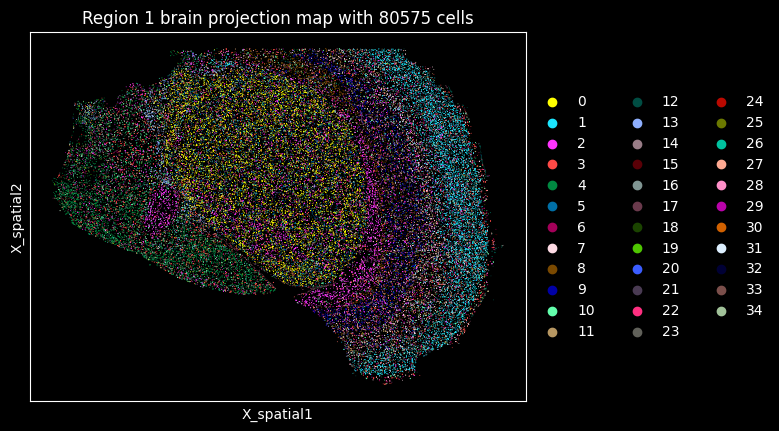

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


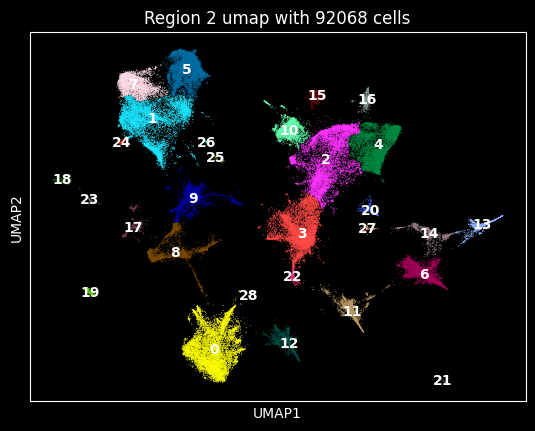

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


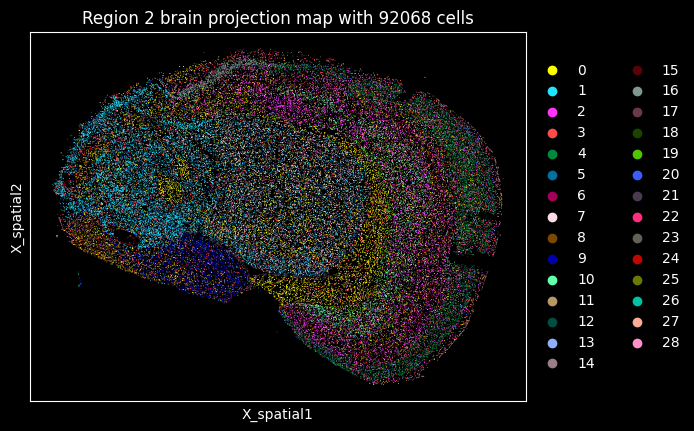

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


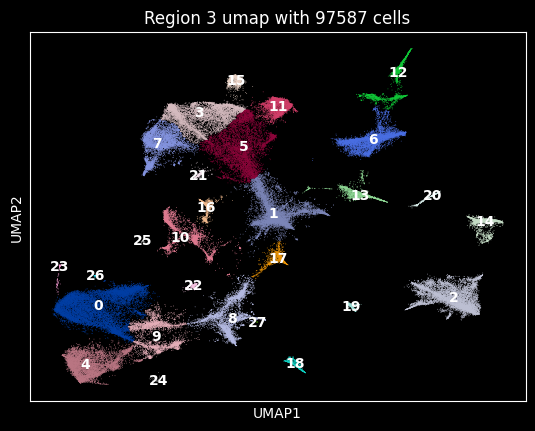

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


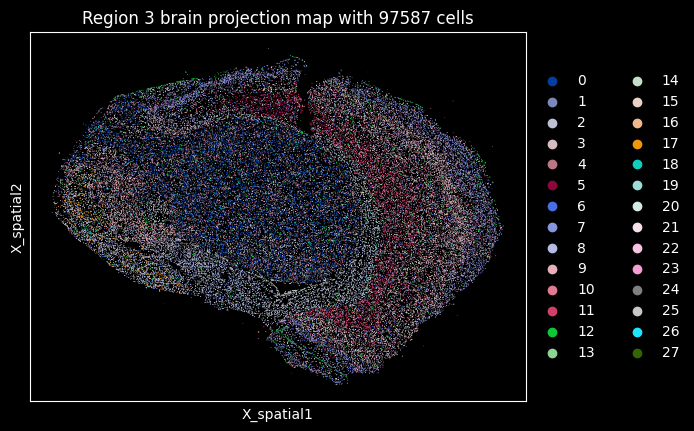

In [50]:
region_scdata_list = [region_0_scdata, region_1_scdata, region_2_scdata, region_3_scdata]
region_list = ['Region 0', 'Region 1', 'Region 2', 'Region 3']
for region_scdata, region in zip(region_scdata_list, region_list):
    sc.pl.umap(region_scdata, 
               color = 'leiden', 
               legend_loc = 'on data', 
               title = f'{region} umap with {len(region_scdata.obs)} cells')
    sc.pl.embedding(region_scdata,
               basis = 'X_spatial',
               color = 'leiden', 
               title = f'{region} brain projection map with {len(region_scdata.obs)} cells')